In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [10]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<Figure size 432x288 with 0 Axes>

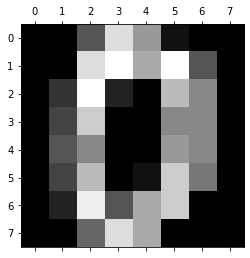

In [13]:
print(digits.data[0])
plt.gray()
plt.matshow(digits.images[0])

In [15]:
digits.target[0:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)   #increasing number of iteration get better convergence 
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [23]:
model.score(X_test,y_test)

0.9611111111111111

target value:	 6
predicted value:	 [6]


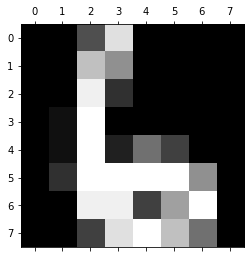

In [30]:
plt.matshow(digits.images[67])                                      #data
print('target value:\t', digits.target[67])                         #target value
print('predicted value:\t',model.predict([digits.data[67]]))        # predicted value

In [32]:
y_predicted = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)        

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 39,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 26,  0,  1],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 39]])

Text(69.0, 0.5, 'Truth')

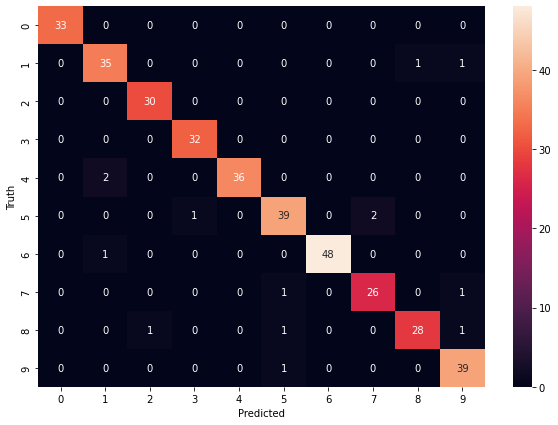

In [35]:
# heatmap showing misclassification using confusion matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')